In [2]:
import pandas as pd
import numpy as np
import os
import sys
import math
import matplotlib.pyplot as plt


fileName = "KOLabels.csv"
df = pd.read_csv(fileName)

In [3]:
def scale(nums, numMax, numMin, newMin=0, newMax=1):
    res = []
    for n in nums:
        r = (nums - numMin)*((newMax - newMin) / (numMax - numMin))
        r += newMin
        res.append(r)
    return res

In [4]:
def meanSDRanges(data):
    # print(days)
    meanRange = data['Mean'].max(), data['Mean'].min()
    SDRange = data['SD'].max(), data['SD'].min()
    meanList = list(data['Mean'])

    meanList = scale(meanList,meanRange[0], meanRange[1], 0, 1,)
    sdList = scale(list(data['SD']),SDRange[0],SDRange[1])
    # print(df.head())
    # print(meanList)
    return meanList,sdList


In [5]:
df2018 = df[:53]
df2019 = df[53:]
df2018Good = df2018['Label'] == 'Good'
df2019Good = df2019['Label'] == 'Good'
df2018Bad = df2018['Label'] == 'Bad'
df2019Bad = df2019['Label'] == 'Bad'

In [6]:
mean2018Good,sd2018Good = meanSDRanges(df2018[df2018Good])
mean2018Bad,sd2018Bad = meanSDRanges(df2018[df2018Bad])
mean2019Good,sd2019Good = meanSDRanges(df2019[df2019Good])
mean2019Bad,sd2019Bad = meanSDRanges(df2019[df2019Bad])

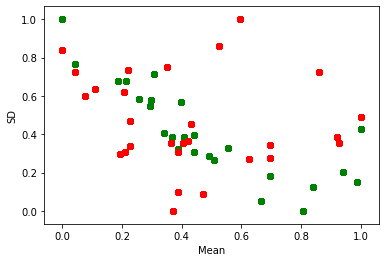

In [7]:
fig2018 = plt.figure()
pl2018 = fig2018.add_subplot(111)
pl2018.scatter(mean2018Good,sd2018Good, c='green')
pl2018.scatter(mean2018Bad,sd2018Bad, c='red')
pl2018.set_xlabel('Mean')
pl2018.set_ylabel('SD')
plt.show()

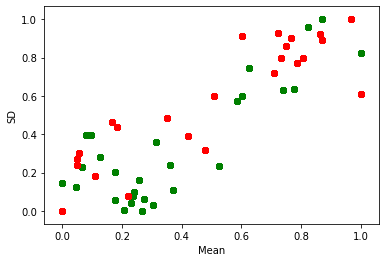

In [9]:
fig2019 = plt.figure()
pl2019 = fig2019.add_subplot(111)
pl2019.scatter(mean2019Good,sd2019Good, c='green')
pl2019.scatter(mean2019Bad,sd2019Bad, c='red')
pl2019.set_xlabel('Mean')
pl2019.set_ylabel('SD')
plt.show()